In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import os
import re
import numpy as np
import pandas as pd
import scipy.stats as stats
import statsmodels as sm

import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('seaborn')

%matplotlib inline

SMALL_SIZE = 8
MEDIUM_SIZE = 10
LARGE_SIZE = 12

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=LARGE_SIZE)   # fontsize of the figure title

In [10]:
def infer_gaussian_from_beta(a,b):

    #plot beta dist
    fig = plt.figure(figsize=(10,4), dpi=160, facecolor='w')
    ax = fig.add_subplot(111)
    
    beta_dist = stats.beta(a,b)
    beta_rvs = beta_dist.rvs(size=2000)
    pdf_range = np.linspace(beta_dist.ppf(0.0001), beta_dist.ppf(0.9999), 100)
    
    ax.hist(beta_rvs, bins=60, facecolor='royalblue', alpha=0.7, density=1, histtype='stepfilled')
    ax.plot(pdf_range, beta_dist.pdf(pdf_range), 'darkorange', lw=3, label='Beta')
    
    #inference
    mu_hat, sigma_hat = stats.norm.fit(beta_rvs)
    
    #plot inferred pdf
    norm_dist = stats.norm(loc=mu_hat, scale=sigma_hat)
    norm_rvs = norm_dist.rvs(size=1000)
    pdf_range = np.linspace(norm_dist.ppf(0.0001), norm_dist.ppf(0.9999), 100)
    ax.plot(pdf_range, norm_dist.pdf(pdf_range), color='black', linestyle='dashed', lw=3, label='Gaussian')
    ax.set_aspect(1./ax.get_data_ratio())
    ax.legend(loc='upper left')
    
    #annotate axis
    text = r"$\alpha$=%s, $\beta$=%s"%(a,b) + "\n"
    text += r"$\hat{\mu}$=%s, $\hat{\sigma}$=%s"%(round(mu_hat, 2), round(sigma_hat, 2))
    ax.annotate(text, xy=(0.01, 0.7), xycoords='axes fraction',
                xytext=(0.02, 0.68), textcoords='axes fraction',
                bbox=dict(boxstyle="round", fc="0.8"))
    
    return(norm_dist, beta_dist)

Estimated probability: 0.005
True probability: 0.001


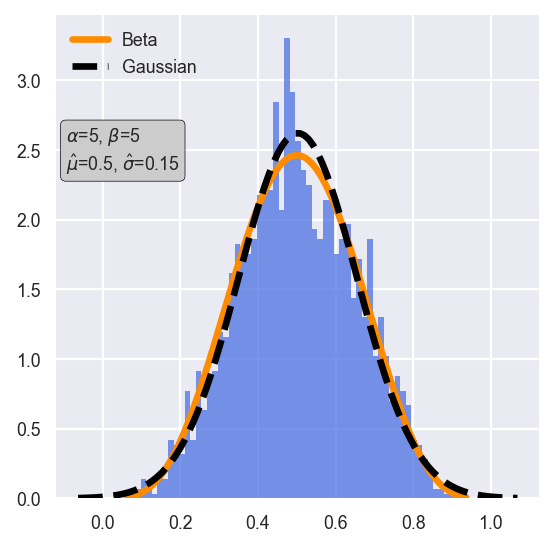

In [14]:
norm_dist,beta_dist = infer_gaussian_from_beta(5,5) #(5,1), (5,2), (5,5)

print("Estimated probability: {}".format(round(1-norm_dist.cdf(0.90),3)))
print("True probability: {}".format(round(1-beta_dist.cdf(0.90),3)))
